In [1]:
import os
import math
import glob
from importlib import reload

import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
%matplotlib inline

from scipy import ndimage

import tifffile as tf

import arabidopsis_utils as thales

In [121]:
tiff_file = '../raw3d/Day7_110921_U112-3.tif'
pot_src = '../leaves/'

_, fname = os.path.split(tiff_file)
bname = os.path.splitext(fname)[0]

pidx = 0
pname = 'pot{}'.format(pidx)

src = pot_src + bname + '/' + pname + '/'
leaf_dst = '../petiole/'
dst = leaf_dst + bname + '/' + pname + '/'

if not os.path.isdir(dst):
    os.makedirs(dst)
print('All results will be saved in ', dst)

filename = src + bname + '_' + pname + '_clean.tif'.format(pidx)
img = tf.imread(filename)
img, ceros, cerosshape = thales.clean_zeroes(img)
img = img.astype(np.uint16)

All results will be saved in  ../petiole/Day7_110921_U112-3/pot0/
62 % reduction from input


In [122]:
bsnaps = thales.collapse_dimensions_max(img)
title = bname + '_' + pname
thales.plot_collapse_dimensions(bsnaps, title, 'arabidopsis', writefig=True, dst=dst);

In [123]:
lfiles = sorted(glob.glob(src + '*leaf*.tif'))
print(len(lfiles))
leaves = [None for x in range(len(lfiles))]
Comps = [None for x in range(len(lfiles))]

for i in range(len(leaves)):
    leaves[i] = tf.imread(lfiles[i])
    leaves[i] = leaves[i].astype(np.uint16)
    snaps = thales.collapse_dimensions_max(leaves[i])
    Comps[i] = snaps

28


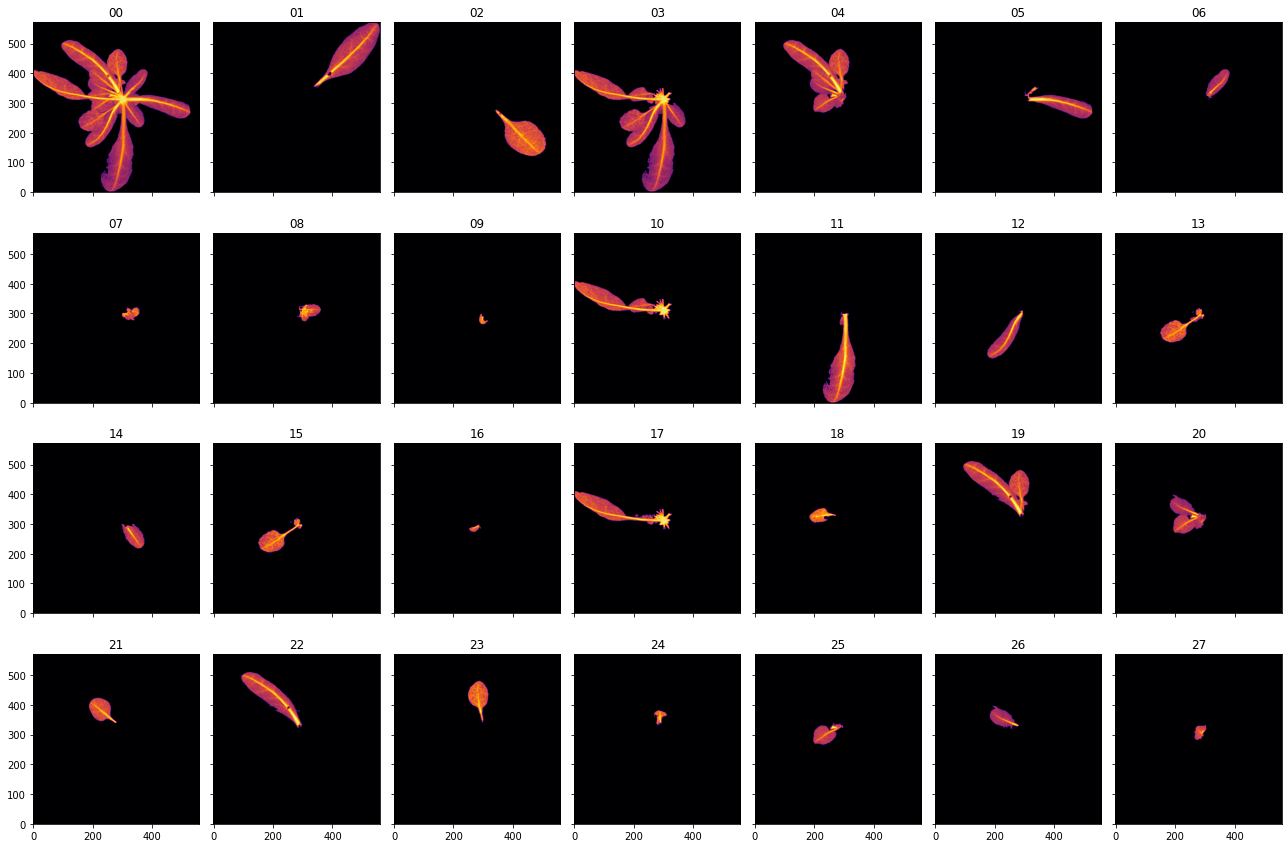

In [124]:
fig, ax = plt.subplots(4,7, figsize=(18,12), sharex=True, sharey=True)

for i,a in enumerate(ax.ravel()):
    a.imshow(Comps[i][0], origin='lower', cmap='inferno')#, vmax=1)
    a.set_title('{:02d}'.format(i))

fig.tight_layout();

In [125]:
segments = [1,2] + list(range(5,10)) + [11,12] + list(range(14,19)) + list(range(21,28))
print(len(segments), 'segments')
segments

21 segments


[1, 2, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27]

In [126]:
avgs = np.zeros((len(segments), 3))
maxs = np.zeros_like(avgs)
mins = np.zeros_like(avgs)

for i in range(len(segments)):
    coords = np.asarray(np.nonzero(leaves[segments[i]]))
    avgs[i] = np.mean(coords, axis=1)
    maxs[i] = np.max(coords, axis=1)
    mins[i] = np.min(coords, axis=1)

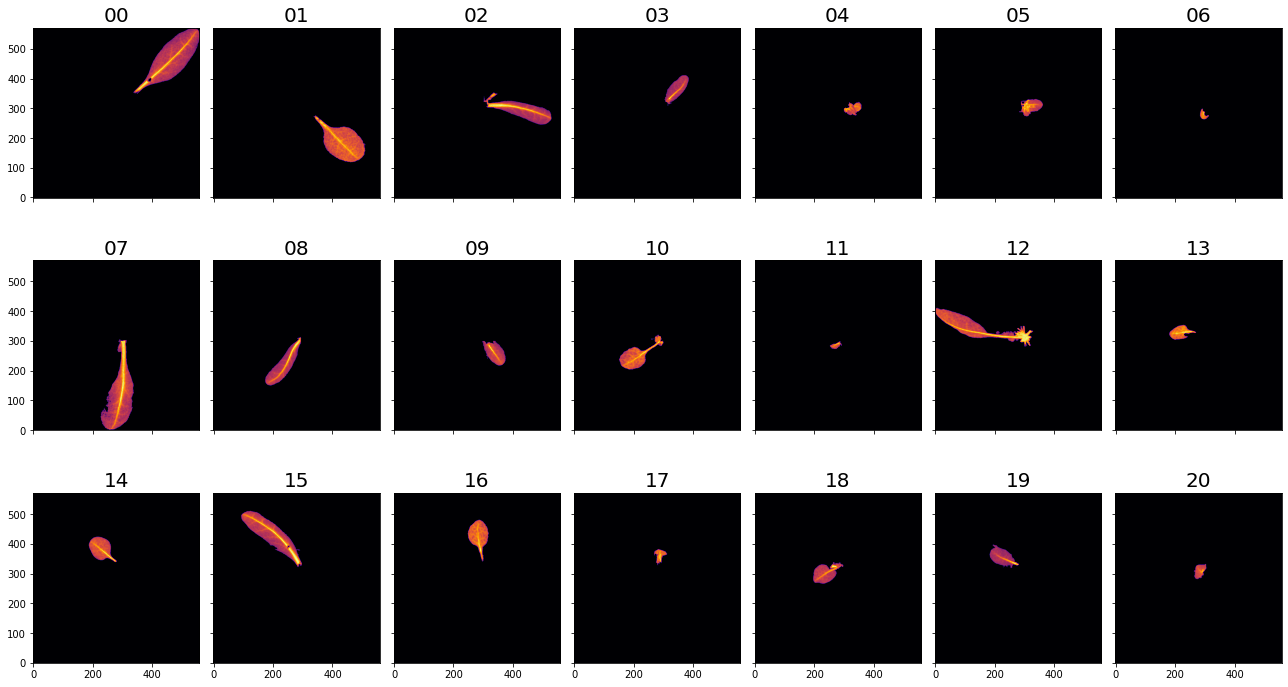

In [127]:
fig, axes = plt.subplots(3,7, figsize=(18,10), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(len(segments)):
    ax[i].imshow(Comps[segments[i]][0], origin='lower', cmap='inferno')#, vmax=1)
    ax[i].set_title('{:02d}'.format(i), fontsize=20)

fig.tight_layout();
filename = dst + 'leaf_individual_panel.jpg'
plt.savefig(filename, dpi=125, bbox_inches='tight', pil_kwargs={'optimize':True})

In [164]:
Snaps = [None for x in range(len(segments))]

for i in range(len(segments)):
    foo = img + 2*leaves[segments[i]]
    snaps = thales.collapse_dimensions_max(foo)
    Snaps[i] = snaps

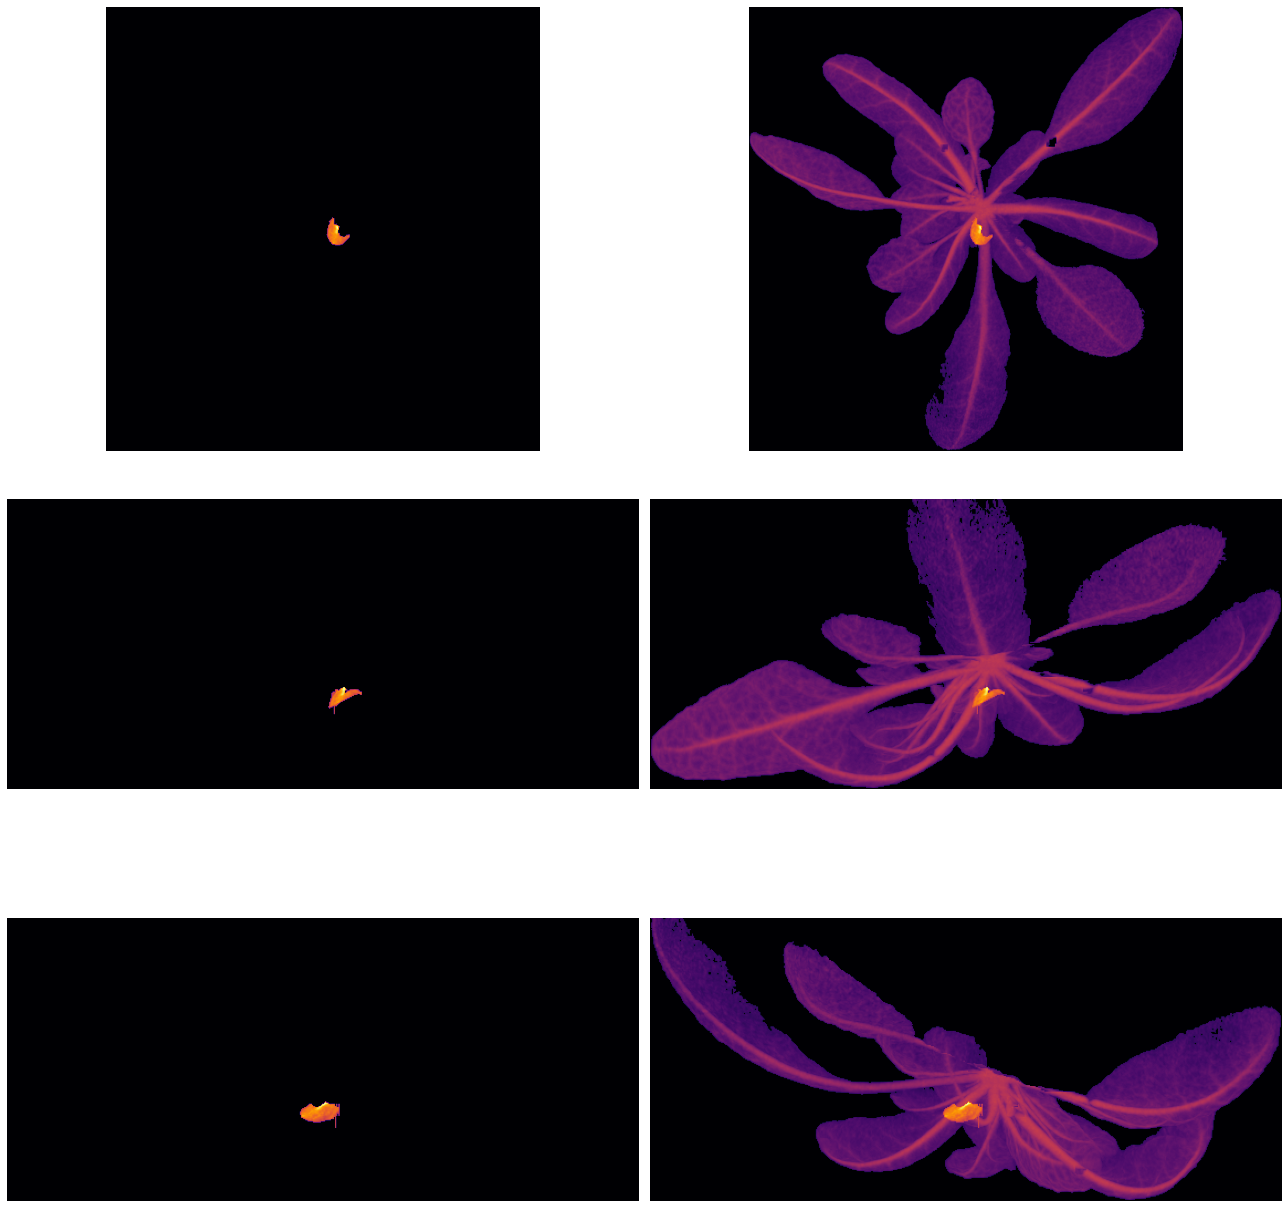

In [169]:
i = 6
fig, ax = plt.subplots(3,2,figsize=(18,18))#,sharey=True, sharex=True)

for j in range(3):
    ax[j,0].imshow(Comps[segments[i]][j], cmap='inferno', origin='lower')
for j in range(3):
    ax[j,1].imshow(Snaps[i][j], cmap='inferno', origin='lower');
for a in ax.ravel():
    a.axis('off')
fig.tight_layout();

In [76]:
argsort = np.argsort(mins[:,0])[::-1]
for i in range(len(argsort)):
    print(i, argsort[i], mins[argsort[i]], sep='\t')

0	1	[129. 120. 336.]
1	4	[105. 278. 298.]
2	7	[ 96.   1. 226.]
3	10	[ 95. 204. 151.]
4	13	[ 90. 304. 182.]
5	11	[ 87. 273. 251.]
6	9	[ 79. 217. 296.]
7	0	[ 67. 351. 336.]
8	6	[ 66. 265. 284.]
9	16	[ 65. 342. 247.]
10	5	[ 65. 275. 282.]
11	2	[ 65. 247. 300.]
12	17	[ 49. 329. 269.]
13	3	[ 38. 310. 303.]
14	14	[ 34. 340. 187.]
15	20	[ 27. 282. 264.]
16	8	[ 26. 150. 175.]
17	19	[ 24. 320. 183.]
18	18	[ 20. 267. 195.]
19	12	[  7. 281.   1.]
20	15	[  1. 323.  94.]


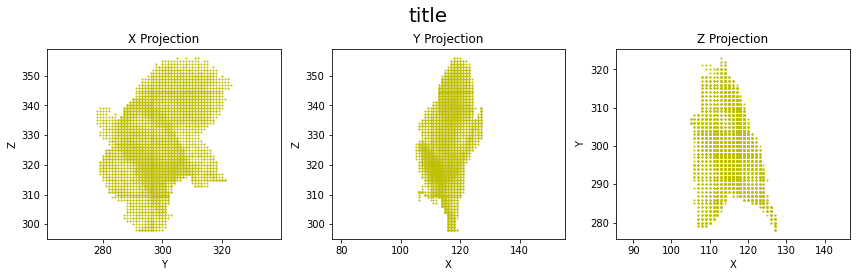

In [77]:
i = 4
coords = np.asarray(np.nonzero(leaves[segments[i]]))
thales.plot_3Dprojections(coords.T)

In [174]:
ordered = [11,17, 4,18,16, 1,14,
           20,10, 3, 9,19, 5, 8,
           12, 0, 7,15, 2, 6,13]

ordered = [ 4,11,17, 5, 6,13,16,
           10,14, 1,12, 0, 7,
           15, 2, 8,19, 9,18, 3,20]

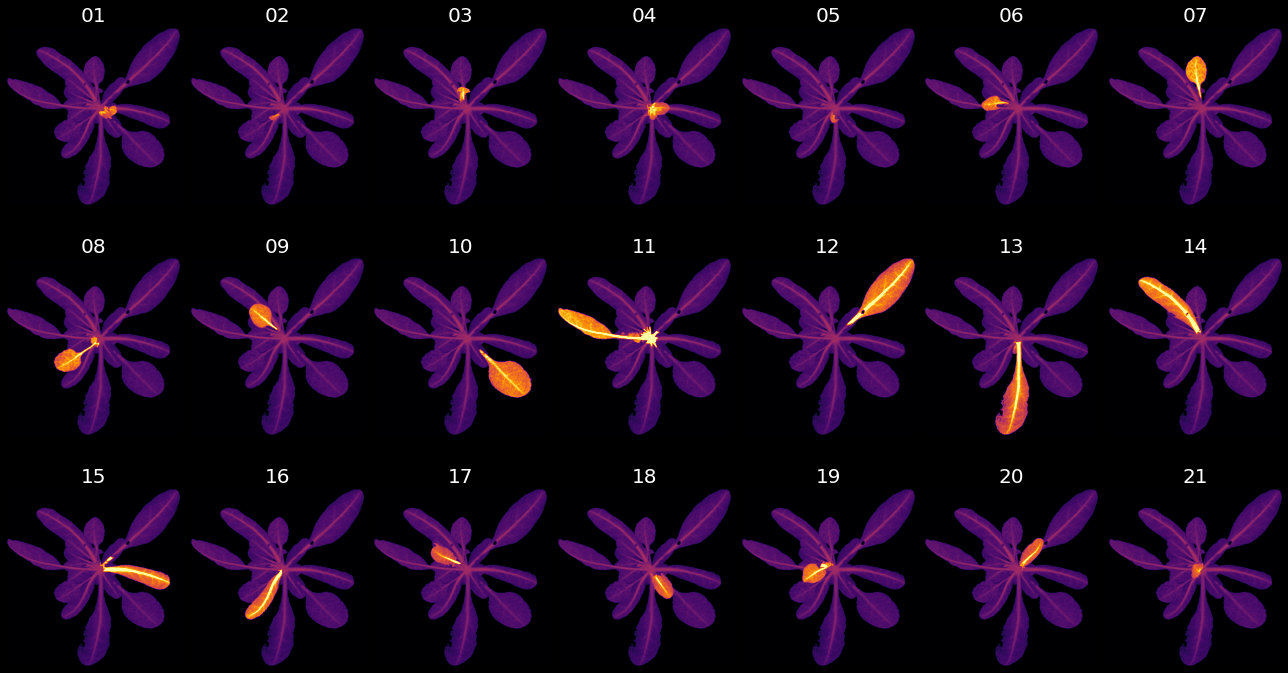

In [179]:
vmax = 425
fig, axes = plt.subplots(3,7,figsize=(18,10), facecolor='k', sharey=True, sharex=True)
ax = axes.ravel()

for i in range(len(ordered)):
    ax[i].imshow(Snaps[ordered[i]][0], cmap='inferno', origin='lower', vmax=vmax)
    ax[i].set_title('{:02d}'.format(i+1), fontsize=20, color='white')
    ax[i].axis('off')
fig.tight_layout();

filename = dst + bname + '_' + pname + '_leaf_numbering_X.jpg'
plt.savefig(filename, dpi=150, bbox_inches='tight', pil_kwargs={'optimize':True})

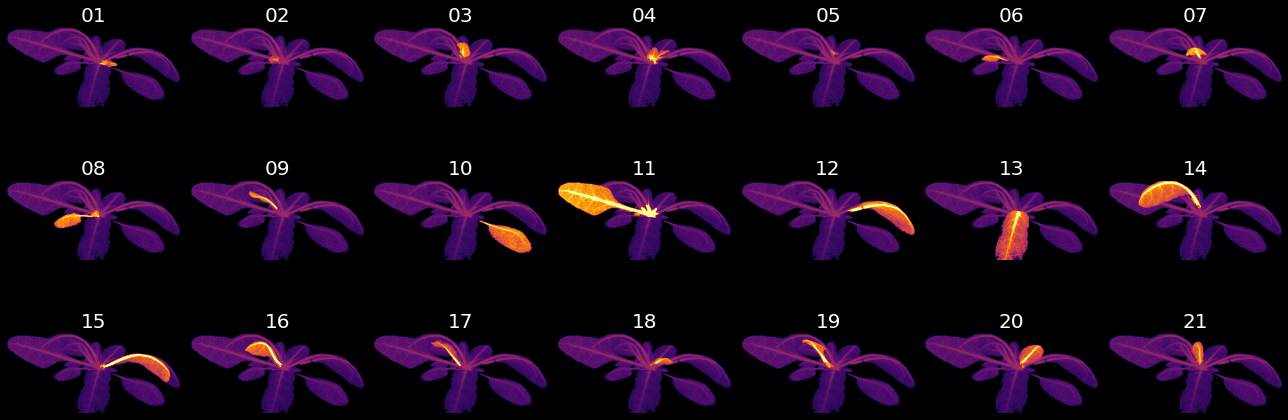

In [180]:
fig, axes = plt.subplots(3,7,figsize=(18,7), facecolor='k',sharey=True, sharex=True)
ax = axes.ravel()

for i in range(len(ordered)):
    ax[i].imshow(Snaps[ordered[i]][1], cmap='inferno', origin='upper', vmax=vmax)
    ax[i].set_title('{:02d}'.format(i+1), fontsize=20, color='white')
    ax[i].axis('off')
fig.tight_layout();

filename = dst + bname + '_' + pname + '_leaf_numbering_Y.jpg'
plt.savefig(filename, dpi=150, bbox_inches='tight', pil_kwargs={'optimize':True})

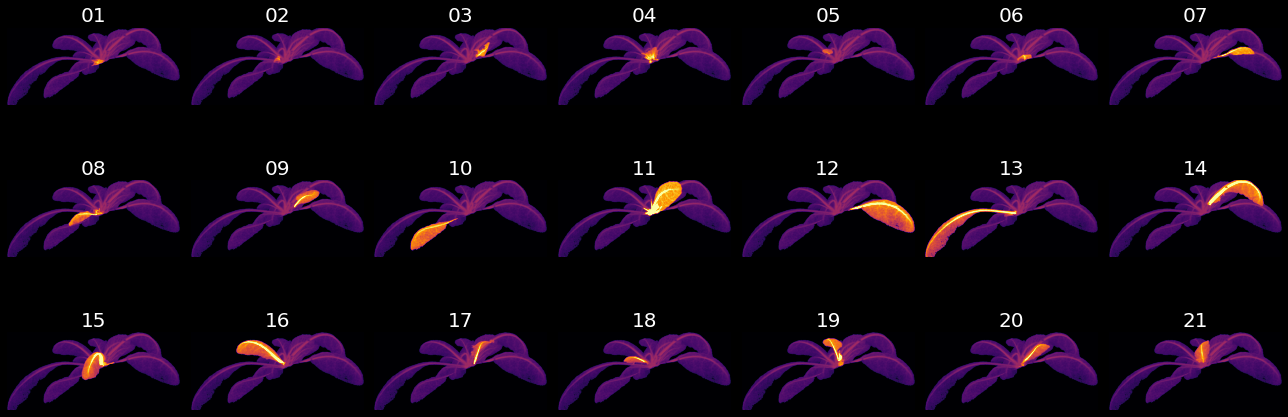

In [181]:
fig, axes = plt.subplots(3,7,figsize=(18,7), facecolor='k',sharey=True, sharex=True)
ax = axes.ravel()

for i in range(len(ordered)):
    ax[i].imshow(Snaps[ordered[i]][2], cmap='inferno', origin='upper', vmax=425)
    ax[i].set_title('{:02d}'.format(i+1), fontsize=20, color='white')
    ax[i].axis('off')
fig.tight_layout();

filename = dst + bname + '_' + pname + '_leaf_numbering_Z.jpg'
plt.savefig(filename, dpi=150, bbox_inches='tight', pil_kwargs={'optimize':True})

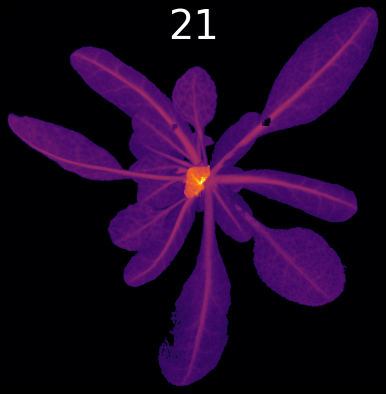

In [191]:
fig, ax = plt.subplots(1,1,figsize=(7,7), facecolor='k', sharey=True, sharex=True)

for i in range(len(ordered)):
    ax.imshow(Snaps[ordered[i]][0], cmap='inferno', origin='lower', vmax=vmax)
    ax.set_title('{:02d}'.format(i+1), fontsize=40, color='white', y=0.9)
    ax.axis('off')

    filename = dst + bname + '_' + pname + '_leaf_X_{:02d}.jpg'.format(i+1)
    plt.savefig(filename, dpi=72, bbox_inches='tight', pil_kwargs={'optimize':True})

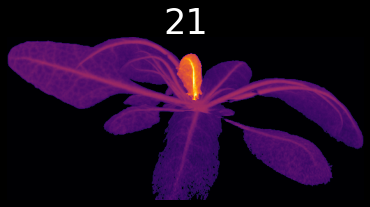

In [202]:
fig, ax = plt.subplots(1,1,figsize=(7,3), facecolor='k', sharey=True, sharex=True)

for i in range(len(ordered)):
    ax.imshow(Snaps[ordered[i]][1], cmap='inferno', origin='upper', vmax=vmax)
    ax.set_title('{:02d}'.format(i+1), fontsize=35, color='white', y=0.98)
    ax.axis('off')

    filename = dst + bname + '_' + pname + '_leaf_Y_{:02d}.jpg'.format(i+1)
    plt.savefig(filename, dpi=72, bbox_inches='tight', pil_kwargs={'optimize':True})

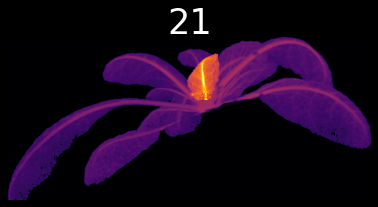

In [201]:
fig, ax = plt.subplots(1,1,figsize=(7,3), facecolor='k', sharey=True, sharex=True)

for i in range(len(ordered)):
    ax.imshow(Snaps[ordered[i]][2], cmap='inferno', origin='upper', vmax=vmax)
    ax.set_title('{:02d}'.format(i+1), fontsize=35, color='white', y=0.98)
    ax.axis('off')

    filename = dst + bname + '_' + pname + '_leaf_Z_{:02d}.jpg'.format(i+1)
    plt.savefig(filename, dpi=72, bbox_inches='tight', pil_kwargs={'optimize':True})